In [16]:
from vision_explanation_methods import DRISE_runner as dr
from helpers.pytorch_yolov8_wrapper import PytorchYoloV8Wrapper
from ultralytics import YOLO

def compute_saliency_maps(results, image_location, model):
    # print(image_location)
    # print(results)
    number = 0
    while (len(results[0].boxes.cls) != number): # Check assumption that it sometimes cannot find the same number of objects
        results_drise = dr.get_drise_saliency_map(nummasks=100, imagelocation=image_location, model= PytorchYoloV8Wrapper(model), savename="anything", numclasses=80, max_figures=2, maskres=(4,4))
        number = len(results_drise)
    # print("Number of objects found in expl: ", number)
    # print("Number of objects found in bounding box: ", len(results[0].boxes.cls))
    return results_drise

In [17]:
from ultralytics import YOLO
import cv2
from scripts.metrics import compute_insertion, compute_insertion_array


car_number = 1
frame_number = 10
image_location = f"datasets/car/car-{car_number}/img/{str(frame_number).zfill(8)}.jpg"

model = YOLO("yolov8n.pt")
index = 0

img = cv2.imread(image_location)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model(img, verbose=False)
exp = compute_saliency_maps(results, image_location, model)[index]["detection"][0].numpy()

y, x, auc = compute_insertion_array(model, exp, img, int(results[0].boxes.cls[index]), divisions=10)

100%|██████████| 99/99 [00:00<00:00, 120.00it/s]


0
1
2
3
4
5
6
7
8
9


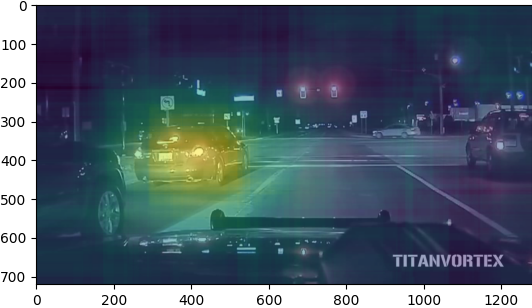

In [18]:
import matplotlib.pyplot as plt
import numpy as np

viridis_frame = plt.cm.viridis(exp)
viridis_frame_rgb = viridis_frame[:, :, :3]  # Extract RGB channels
alpha = 0.5  # You can adjust the alpha value as needed
dst2 = cv2.addWeighted(
        img, alpha, (viridis_frame_rgb * 255).astype(np.uint8), 1 - alpha, 0
    )

plt.imshow(dst2)

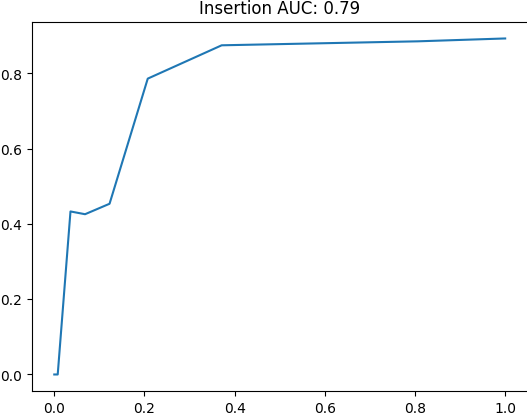

In [19]:

plt.title(f"Insertion AUC: {auc:.2f}")
plt.plot(x, y)

In [20]:
int(results[0].boxes.cls[0])

2